# NLE Assessed Coursework for Resit Aug 2019

For this assessment, you are expected to complete and submit this notebook file.  When answers require code, you may import and use library functions (unless explicitly told otherwise).  All of your own code should be included in the notebook rather than imported from elsewhere.  Written answers should also be included in the notebook.  You should insert as many extra cells as you want and change the type between code and markdown as appropriate.

In order to avoid misconduct, you should not talk about these coursework questions with your peers.  If you are not sure what a question is asking you to do or have any other questions, please contact the module tutor (Julie Weeds).

Marking guidelines are provided as a separate document.

In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell.

In [1]:
candidateno=150074 #this MUST be updated to your candidate number so that you get a unique data sample
candidateno=2*candidateno #this will ensure that your unique dataset is different to previous attempts at this coursework

Now some preliminary imports of the various libraries you will need.  Note the following:
* You must be running Python 3.6
* Most of the following libraries are included in the Anaconda distribution of python 3.6
* You may need to install spacy by running the following at the command line
    * conda install spacy
    * python -m spacy download en
* The sussex_nltk library is included in the resources.zip file with this assignment
    * if you have this in a directory other than the current working directory then you must use sys.path.append() to add the path to that directory to your system path


In [2]:
#preliminary imports
import sys
#Lecturer's resources path:
#sys.path.append(r'\\ad.susx.ac.uk\ITS\TeachingResources\Departments\Informatics\LanguageEngineering\resources')
#sys.path.append(r'/Users/juliewe/Documents/teaching/NLE2018/resources')

#150074 Student's resources path:
sys.path.append(r'C:\Users\adenu\Documents\resources\resources')
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.tokenize import word_tokenize

from classification_utils import * #for implementation of RunNB function
from collections import defaultdict,Counter #for implementation of counter function

from sussex_nltk.corpus_readers import AmazonReviewCorpusReader
import random
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

import spacy
nlp=spacy.load('en_core_web_sm')
from nltk.corpus import gutenberg

Sussex NLTK root directory is C:\Users\adenu\Documents\resources\resources


# Question 1: Naive Bayes Classification (25 marks)

In this question, you will be considering how a Naive Bayes classifier can be applied to the task of deciding whether sentences are relevant or not relevant to the kitchen domain.

The code below will generate for you two small unique sets of sentences, which you should refer to in your answer to this question.   This question will be marked on the quality of your explanations rather than the quality of your code.

In [3]:
#Do NOT change the code in this cell.

topics=["book","kitchen","dvd","electronics"]
samplesize=3
stop=stopwords.words('english')

trainingsentences=[]
testsentences=[]
cr = AmazonReviewCorpusReader()

for topic in topics:
    random.seed(candidateno)
    if topic == "kitchen":
        key="kitchen"
    else:
        key="not-kitchen"
    topicsentences=[]
    while len(topicsentences)<2:
        topicsentences=[({token.lower():True for token in doc if token not in stop and token.isalpha()},key) for doc in cr.category(topic).sample_sents(samplesize=samplesize) if len(doc)>0]
    testsentences.append(topicsentences[0])
    trainingsentences+=topicsentences[1:]

random.shuffle(trainingsentences)
random.shuffle(testsentences)
print("Number of training sentences is {}.  Number of testing sentences is {}".format(len(trainingsentences),len(testsentences)))


Number of training sentences is 8.  Number of testing sentences is 4


a) With reference to the sentences generated above, **explain** how a Naive Bayes classifer would be trained to carry out the task of deciding whether sentences are relevant to the kitchen domain.  You do **not** need to build or train a classifier.  However, you should explain the relevant probabilities with reference to examples taken from your samples of sentences.  \[10 marks\]

**Answer 1(a):** 

A Naive Bayes(NB) classifier is a family of probabilistic algorithms that use the probability theory and Bayes’ Theorem to predict the tag of a text (this could be a group of topics as shown in the code above). They are probabilistic, which means that they calculate the probability of each tag for a given text, and then output the tag with the highest probability. The way they get these probabilities is by using Bayes’ Theorem, which describes the probability of a feature, based on prior knowledge of conditions that might be related to that feature. <font color=blue>[1]</font> 

Training data is a method used to build the NB model, it's sometimes referred to as classifier encoding. It basically teaches the classifier how to tag different text and this in turn informs which topic the text is categorised into.  It is essential that the data used in the testing phase is not used during the training phase as this can lead to overestimating performance. 

An NB classifier can be trained to decide whether sentences are relevant or not to the kitchen domain by first creating a handcrafted list of words that would be relevant to the each of the four topics listed in the cell above. An example of this:

```
kitchen_sents_train = [
    "Great colour scheme.",
    "Very spacious kitchen.",
    "Newly furbished stove.",
]

book_sents_train = [
    "Best selling author.",
    "What a story!.",
]

dvd_sents_train = [
    "Movie was amazing.",
    "Another gory drama.",
]

electronics_sents_train = [
    "Poor screen resolution.",
]
```

Seeing as the sentences produced in the cell above states that I have a total number of 8 training sentences, I made sure to demonstrate my examples of documents for each class in a way that fulfills this limit. 

The next step is the "bag-of-words" approach. This is the assumption that each document is to be taken as just a bag of words with no specified order. Unlike other classifiers that may be concerned with identifying the most frequent words from the kitchen, book, DVD and electronics reviews, our NB classifier maps each word appearing in the document as True along with the class that word belongs to, in this case, it would be the `kitchen` domain. The training data would eventually become a dictionary that represents this mapping process. <font color=blue>[2]</font>

The NB classifier partitions data into a training data set and a testing data set. With reference to the sentences produced above, the probability that a document is relevant to the class `kitchen` is $3/8$. From the lists above, we only have 3 sentences that are relevant to `kitchen`, however, in total we have 8 training sentences. This can also be shown as $P(\,\mbox{kitchen})=3/8=0.4$.

b) With reference to the sentences generated above, **explain** how a trained Naive Bayes classifier would assign a class to a sentence. \[5 marks\]

**Answer 1(b):** 

Each trained document is a pair consisting of a dictionary that maps each word that appears in the document to True, and a string denoting the class of the document. The most probable class is assigned to a word based on a tuple of features, this is shown in the Naive Bayes classification rule and in turn used to estimate along with the generated training data which class a sentence belongs to. 

In programming terms, the classifier will use class priors(the probability that documents belong to a named class), conditional probabilities(the conditional probability of a word given a class from training data) and sentences from the training data as arguments and then returns the class the sentence belongs to. As we have 8 training sentences, the operation is iterated 8 times, enough to categorise each sentence appropriately. <font color=blue>[3]</font>

c) The labels assigned to the sentences contained in the variable `testsentences` above are \['kitchen','not-kitchen','not-kitchen','not-kitchen'\].  Using this example to illustrate your answer, **explain** how each of the performance metrics of *accuracy*, *precision*, *recall* and *F1-score* are calculated.  Which of these metrics would you use to choose between classification models in this example?  **Justify your answer**. \[10 marks\]


**Answer 1(c):** 

Firstly, in order to perform these calculations, it is important to identify the predicted test sentences and the actual test sentences. The example give in the question above shows the predicted testsentences variable as  ['kitchen','not-kitchen','not-kitchen','not-kitchen']. I have printed the actual test sentences in the cell below:

In [4]:
testsentences

[({'i': True,
   'bought': True,
   'book': True,
   'reading': True,
   'reviews': True,
   'wish': True,
   'paid': True},
  'not-kitchen'),
 ({'where': True, 'quality': True, 'freestyling': True}, 'not-kitchen'),
 ({'you': True,
   'may': True,
   'want': True,
   'consider': True,
   'larger': True,
   'cases': True,
   'depending': True,
   'tastes': True,
   'otherwise': True,
   'probably': True,
   'satisfy': True,
   'needs': True},
  'not-kitchen'),
 ({'reused': True,
   'often': True,
   'go': True,
   'dollar': True,
   'store': True,
   'spend': True,
   'buck': True,
   'totally': True,
   'usless': True,
   'piece': True,
   'something': True,
   'breaks': True,
   'soon': True,
   'bring': True,
   'home': True,
   'hmmm': True},
  'kitchen')]

I have now established my actual and predicted testsenteces lists:
* `actual_testsentences = ['not-kitchen','not-kitchen','not-kitchen','kitchen']`
* `pred_testsentences = ['kitchen','not-kitchen','not-kitchen','not-kitchen']`

- Accuracy in the context of document classification is the proportion of items in the test set that are classified correctly. i.e. $(|{i│prediction(i)=label(i}|)/(|{i}|)$ It is calculated by the formula: $\frac{\mbox{number of test documents that the classifier classifiers correctly}} {\mbox{total number of test documents}}$ <font color=blue>[4]</font> <font color=blue>[5]</font> For the example provided in the variable `testsentences` it is calculated as: $2/4 = 0.5$ This is a low accuracy score. 
#  
- Precision in the context of document classification is the proportion of positive predictions that are correct. It can be calculated by the formula: $\frac{\mbox{True Positives}} {\mbox{True Positives + False Positives}}$. This formula divides the True Positives (identified correctly as kitchen) by the sum of True Positives and False Positives (incorrectly identified as kitchen). For the example provided in the variable `testsentences` it is calculated as: $0/(0+1) = 0$. <font color=blue>[4]</font> <font color=blue>[5]</font> 
#  
- Recall in the context of document classification is the proportion of actually positive documents that are predicted correctly. It can be calculated by the formula: $\frac{\mbox{True Positives}} {\mbox{True Positives + False Negatives}}$. This formula divides the True Positives (identified correctly as kitchen) by the sum of True Positives and $False Negatives$ (incorrectly identified as not kitchen). For the example provided in the variable `testsentences` it is calculated as: $0/(0+1) = 0$. <font color=blue>[4]</font> <font color=blue>[5]</font>
#  
- F1-score in the context of document classification is a harmonic mean of the precision and recall scores. It can be calculated by the formula: $\frac{\mbox{2 * Precision * Recall}} {\mbox{Precision + Recall}}$. For the example provided in the variable `testsentences` it is calculated as: $(2*((0*0)/(0+0)) = 0$. <font color=blue>[4]</font> <font color=blue>[5]</font> 

This means the classification model has been a total failure, nonetheless all models are wrong in some aspects, but some are useful. That is, all classification models will generate some false negatives, some false positives, and possibly both. You can tune a model to minimize one or the other, there is some kind of tradeoff, a decrease in false negatives leads to an increase in false positives or vice versa. In order to choose the best performance metrics for the models, you’ll need to optimize for the performance metrics that are most useful for your specific problem.<font color=blue>[8]</font>

I would not choose to use accuracy as my performance metric as it can be misleading. This is because the class provided is unbalanced. For the example provided in the variable `testsentences` only 25% of documents are relevant to 'kitchen'.Instead, I would use the F1 Score as my means of performance evaluation. This is because we have an uneven class distribution and F1-score is best to use in situations like this.  

## Question 2: Training Data for Sentiment Analysis (25 marks)
The objective of this question is to investigate the extent to which performance of a Naive Bayes classifier is affected by the quantity and quality of the training data.  Does more training data mean better performance?  Is performance degraded if we train on one domain and test on another domain?  For example, suppose we train a sentiment classifier on book reviews and then test that classifier on a collection of dvd reviews. Does it perform as well as it would when trained on dvd reviews?

The code below is included to enable you to get pre-formatted training and test data for a given category (evenly split between positive and negative reviews).  In this question, there are marks available for the quality of your programming, your experimental design and your interpretation of results.


In [5]:
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the 
            pair is a list of the training data and the second is a list of the test data.
    """
    
    data = list(data)  
    n = len(data)  
    train_indices = random.sample(range(n), int(n * ratio))          
    test_indices = list(set(range(n)) - set(train_indices))    
    train = [data[i] for i in train_indices]           
    test = [data[i] for i in test_indices]             
    return (train, test)                       
 

def feature_extract(review):
    """
    Generate a feature representation for a review
    :param review: AmazonReview object
    :return: dictionary of Boolean features
    """
    return {word:True for word in review.words()}

def get_training_test_data(category,ratio=0.7,seed=candidateno):
    """
    Get training and test data for a given category and ratio, pre-formatted for use with NB classifier
    :param category: category of review corpus, one of ["kitchen, "dvd, "book", "electronics"]
    :param ratio: proportion of data to use as training data
    :return: pair of lists 
    """
    reader=AmazonReviewCorpusReader().category(category)
    random.seed(candidateno)
    pos_train, pos_test = split_data(reader.positive().documents(),ratio=ratio)
    neg_train, neg_test = split_data(reader.negative().documents(),ratio=ratio)
    train_data=[(feature_extract(review),'P')for review in pos_train]+[(feature_extract(review),'N') for review in neg_train]
    test_data=[(feature_extract(review),'P')for review in pos_test]+[(feature_extract(review),'N') for review in neg_test]
    return train_data,test_data

a) By varying the amount of training data used, **investigate** the impact of the amount of training data used on the accuracy of a Naive Bayes classifier for each of the four domains: *dvd*, *book*, *kitchen* and *electronics*.  You should use the NaiveBayesClassifier from the `nltk.classify` library.  You should also use a table and an appropriate graph(s) to display your results.  Make sure you **discuss** your results and conclusions. \[8 marks\]

**Answer 2(a):** 

,Sample size,DVD accuracy,BOOK accuracy,KITCHEN accuracy,ELECTRONICS accuracy
0,1,0.799000,0.778000,0.829667,0.802333
1,10,0.792000,0.779333,0.839333,0.805000
2,50,0.805000,0.775667,0.829000,0.801000
3,100,0.785333,0.791333,0.831667,0.800667
4,200,0.795333,0.788333,0.825000,0.807000
5,400,0.790000,0.785333,0.832667,0.792333
6,600,0.796333,0.791333,0.828000,0.795000
7,700,0.800667,0.785000,0.834000,0.802000


(0.0, 1.0)

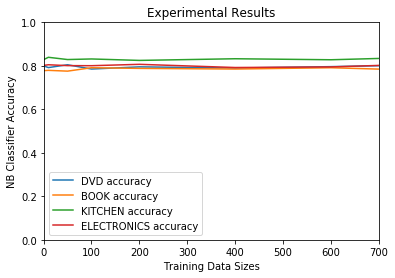

In [6]:
dvd_reader = AmazonReviewCorpusReader().category("dvd")
book_reader = AmazonReviewCorpusReader().category("book")
kitchen_reader = AmazonReviewCorpusReader().category("kitchen")
electronics_reader = AmazonReviewCorpusReader().category("electronics")

repetitions = 5# accuracy figures are averaged over this many repetitions
trainingdata_sizes = [1,10,50,100,200,400,600,700] #these are the sizes of training data

dvd_accuracies=[]
book_accuracies=[]
kitchen_accuracies=[]
electronics_accuracies=[]

for size in trainingdata_sizes:
    DVD_NB_accuracy_tot = 0
    BOOK_NB_accuracy_tot = 0
    KITCHEN_NB_accuracy_tot = 0
    ELECTRONICS_NB_accuracy_tot = 0
    
    for i in range(repetitions):
        pos_train, pos_test = split_data(dvd_reader.positive().documents(), ratio=0.7)
        neg_train, neg_test = split_data(dvd_reader.negative().documents(), ratio=0.7)
        
        pos_train1, pos_test1 = split_data(book_reader.positive().documents(), ratio=0.7)
        neg_train1, neg_test1 = split_data(book_reader.negative().documents(), ratio=0.7)

        pos_train2, pos_test2 = split_data(kitchen_reader.positive().documents(), ratio=0.7)
        neg_train2, neg_test2 = split_data(kitchen_reader.negative().documents(), ratio=0.7)

        pos_train3, pos_test3 = split_data(electronics_reader.positive().documents(), ratio=0.7)
        neg_train3, neg_test3 = split_data(electronics_reader.negative().documents(), ratio=0.7)
                                           
        DVD_NB_accuracy_tot += run_NB(pos_train,neg_train,pos_test,neg_test)
        BOOK_NB_accuracy_tot += run_NB(pos_train1,neg_train1,pos_test1,neg_test1)
        KITCHEN_NB_accuracy_tot += run_NB(pos_train2,neg_train2,pos_test2,neg_test2)
        ELECTRONICS_NB_accuracy_tot += run_NB(pos_train3,neg_train3,pos_test3,neg_test3)
    
    dvd_accuracies.append(DVD_NB_accuracy_tot/repetitions)
    book_accuracies.append(BOOK_NB_accuracy_tot/repetitions)
    kitchen_accuracies.append(KITCHEN_NB_accuracy_tot/repetitions)
    electronics_accuracies.append(ELECTRONICS_NB_accuracy_tot/repetitions)

df = pd.DataFrame(list(zip(trainingdata_sizes, dvd_accuracies, book_accuracies, kitchen_accuracies, electronics_accuracies)), columns=["Sample size","DVD accuracy","BOOK accuracy","KITCHEN accuracy","ELECTRONICS accuracy"])
display(df)

ax = df.plot(title="Experimental Results",x=0)
ax.set_ylabel("NB Classifier Accuracy")
ax.set_xlabel("Training Data Sizes")
ax.set_ylim(0.0,1.0)

Words that are not relevant to each set such as, "the", "and" and "is" would reduce the accuracy of the data. If the training data was to only contain relevant words, then increasing the amount would positively impact the data.

The graph above shows a steady line as the training data size increases for each category. The changes in the amount of training data generally do not affect the accuracy of our NB Classifier. For the most part, the classifier produces the same level of accuracy.

b) For each possible combination of source and target domain, **evaluate** the accuracy of a Naive Bayes classifier trained on the source domain and tested on the target domain.  There are four domains so there are 16 possible combinations you should consider.  You should use a table and an appropriate graph(s) to display your results.  Make sure you **discuss** your results and conclusions. \[8 marks\]

**Answer 2(b):** 

,Source,Target,Accuracy
0,dvd,dvd,0.79
1,dvd,book,0.74
2,dvd,kitchen,0.65
3,dvd,electronics,0.63
4,book,dvd,0.69
5,book,book,0.76
6,book,kitchen,0.62
7,book,electronics,0.62
8,kitchen,dvd,0.70
9,kitchen,book,0.66


(0.0, 1.0)

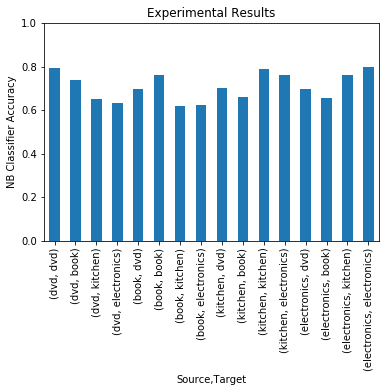

In [8]:
dvd_test, dvd_train   = get_formatted_train_test_data("dvd")
book_test, book_train = get_formatted_train_test_data("book")
kitchen_test, kitchen_train  = get_formatted_train_test_data("kitchen")
electronics_test, electronics_train = get_formatted_train_test_data("electronics") 

sources = {"dvd" : dvd_train, 
           "book" : book_train,
           "kitchen" : kitchen_train,
           "electronics" : electronics_train
         }
targets = {"dvd" : dvd_test, 
           "book" : book_test,
           "kitchen" : kitchen_test,
           "electronics" : electronics_test
         }

results = []
for source in sources.keys():
    for target in targets.keys():
        results.append((source,target,run_NB_preformatted(sources[source],targets[target])))
pd.set_option('precision',2)
df = pd.DataFrame(results,columns=["Source","Target","Accuracy"])   
display(df)
ax = df.set_index(['Source', 'Target']).plot.bar(legend=False,title="Experimental Results")
ax.set_ylabel("NB Classifier Accuracy")
ax.set_ylim(0.0,1.0)

This experiment is a good way of finding out how the NB classifiers level of accuracy is affected if it is trained on one dataset but tested on another. The technical term for this process is cross-domain sentiment analysis. We are trying to discover if there is any deviation in accuracy between changing source and target domains. 

The results above show that the classifiers accuracy is highest when the source and target domains are the same. The reason for this is clearly because the classifier is trained and tested on the same data. However, it is interesting to notice that when the source or target domains are either `kitchen` or `electronics` the accuracy remained relatively high in comparison to other combinations. This is most likely because the data from these two categories are probably going to be of similar content. You could say a lot of kitchen appliances are under the umbrella(a hyponym) of electronics. 

c) Adapt your code so that you can build and use a training set built from multiple categories.  Now **investigate** how having a mixture of source domains affects the accuracy of the Naive Bayes classifier on the target domain.  Make sure you control for or consider how much any improvements are due to the quantity of the training data. \[9 marks\]

**Answer 2(c):** 

,Source,Target,Accuracy
0,dvd,dvd,0.84
1,dvd,book,0.74
2,dvd,kitchen,0.65
3,dvd,electronics,0.65
4,book,dvd,0.74
5,book,book,0.80
6,book,kitchen,0.67
7,book,electronics,0.60
8,kitchen,dvd,0.76
9,kitchen,book,0.68


(0.0, 1.0)

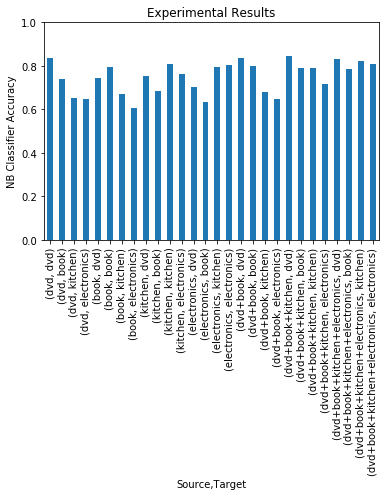

In [9]:
dvd_test, dvd_train   = get_formatted_train_test_data("dvd")
book_test, book_train = get_formatted_train_test_data("book")
kitchen_test, kitchen_train  = get_formatted_train_test_data("kitchen")
electronics_test, electronics_train = get_formatted_train_test_data("electronics") 

sources = {"dvd" : dvd_train, 
           "book" : book_train,
           "kitchen" : kitchen_train,
           "electronics" : electronics_train,
           "dvd+book" : dvd_train + book_train,
           "dvd+book+kitchen" : dvd_train + book_train + kitchen_train,
           "dvd+book+kitchen+electronics": dvd_train + book_train + kitchen_train + electronics_train
         }
targets = {"dvd" : dvd_test, 
           "book" : book_test,
           "kitchen" : kitchen_test,
           "electronics" : electronics_test
         }

results = []
for source in sources.keys():
    for target in targets.keys():
        results.append((source,target,run_NB_preformatted(sources[source],targets[target])))
pd.set_option('precision',2)
df = pd.DataFrame(results,columns=["Source","Target","Accuracy"])   
display(df)
ax = df.set_index(['Source', 'Target']).plot.bar(legend=False,title="Experimental Results")
ax.set_ylabel("NB Classifier Accuracy")
ax.set_ylim(0.0,1.0)

The results above show that if a classifier is trained in more than one source domain the accuracy increases. As we keep on adding categories to the source domain the classifier becomes more intelligent. This has a positive effect on its performance, the target domain may not even be part of the source domain that the classifier has trained with and the classifier's accuracy would still increase. I think this happens because even though the classifier may not be trained in a specific target domain if it has more than one source domain to pull information from it will generally perform at a better rate. 

## Question 3: Named Entity Recognition and Linking (25 marks)

The code below will run the SpaCy system on the text from Persuasion by Jane Austen.  `mysample` contains a 50% sample which is unique to your candidate number.

In [10]:
#Do NOT change the code in this cell.

#preparing corpus

def clean_text(astring):
    #replace newlines with space
    newstring=re.sub("\n"," ",astring)
    #remove title and chapter headings
    newstring=re.sub("\[[^\]]*\]"," ",newstring)
    newstring=re.sub("VOLUME \S+"," ",newstring)
    newstring=re.sub("CHAPTER \S+"," ",newstring)
    newstring=re.sub("\s\s+"," ",newstring)
    #return re.sub("([^\.|^ ])  +",r"\1 .  ",newstring).lstrip().rstrip()
    return newstring.lstrip().rstrip()


def get_sample(sentslist,seed=candidateno):
    random.seed(seed)
    random.shuffle(sentslist)
    testsize=int(len(sentslist)/2)
    return sentslist[testsize:]
    
persuasion=clean_text(gutenberg.raw('austen-persuasion.txt'))
nlp_persuasion=list(nlp(persuasion).sents)

mysample=get_sample(nlp_persuasion)

a) **Write code** and **extract**:
* the 30 most common strings referring to PEOPLE in `mysample`.
* the 30 most common strings referring to PLACES in `mysample`.

\[6 marks\]

**Answer 3(a):** 

In [11]:
x = " ".join(str(v) for v in mysample)
x = nlp(x)

In [12]:
def named_entity_counts(document,named_entity_label):
    occurrences = [ent.string.strip() for ent in document.ents
                   if ent.label_ == named_entity_label and ent.string.strip()]
    return Counter(occurrences)

text = x
entity_type = 'PERSON'
number_of_entities = 30
display(pd.DataFrame(named_entity_counts(text,entity_type).most_common(number_of_entities),columns=["PEOPLE","Count"]))

,PEOPLE,Count
0,Anne,167
1,Mr Elliot,73
2,Mary,61
3,Walter,60
4,Charles,60
5,Lady Russell,59
6,Captain Wentworth,49
7,Wentworth,48
8,Elizabeth,39
9,Mrs Smith,31


In [13]:
def named_entity_counts(document,named_entity_label1, named_entity_label2, named_entity_label3):
    occurrences = [ent.string.strip() for ent in document.ents
                   if ent.label_ == named_entity_label1 or ent.label_ == named_entity_label2 or ent.label_ == named_entity_label3 and ent.string.strip()]
    return Counter(occurrences)

text = x
entity_type = ('LOC')
entity_type2 = ('GPE')
entity_type3 = ('FAC')
number_of_entities = 30
display(pd.DataFrame(named_entity_counts(text,entity_type,entity_type2,entity_type3).most_common(number_of_entities),columns=["PLACES","Count"]))

,PLACES,Count
0,Bath,47
1,Kellynch,23
2,Camden Place,14
3,Kellynch Hall,10
4,the Great House,6
5,Monkford,5
6,London,5
7,Rivers Street,4
8,North Yarmouth,3
9,Shropshire,3


I had a problem adapting my `named_entity_counts()` function to count the number of entities in `mysample`. The `named_entity_counts()` function kept producing errors and I later found out that this was because the `mysample` variable was a list type. I decided to manoeuvre around this conundrum by converting this list into a string using the `.join()` method. I then ran this text string through the language processing pipeline stored in nlp so that it is parsed. 

In the PLACES extraction, I have combined both the 'GPE'(Countries, cities, states.), 'LOC'(Non-GPE locations, mountain ranges, bodies of water.) and 'FAC'() entity types into one. This is for a number of reasons: 

- Firstly, the sole use of either one of these categories does not capture up to 30 strings related to PLACES. As the question states that we are required to extract the 30 most common strings referring to PLACES in `mysample`  I decided to combine the two entity types so that the question is answered appropriately. 
- Secondly, both of these entity types pertain to the question at hand. My thought is that if I capture the three entity types together it would produce a more accurate extraction. Without doing this there is a possibility that if I had only used one of the entity types('GPE', 'LOC' or 'FAC') there may be some strings referring to PLACES that I would not have extracted. 

b) Making reference to specific examples from the text in `mysample`, **discuss** the different types of errors made by the named entity recogniser. \[6 marks\]

**Answer 3(b):** 

There are many different types of errors that are made by the named entity recogniser. I have listed a few of them below:
- Identifying LOCs as PEOPLE names
- Identifying ORGs as PEOPLE names 
- Identifying PEOPLE names as DATEs
- Identifying EVENTs as ORGs or PEOPLE names 
- Identifying an ORG as a WORK OF ART
- Identifying multi-word names 
- Identifying an ORG as an ORD

Specific examples of these types of errors from the text in `mysample` include:
- The identification of the token "Mr. Elliot" as a token in the PLACES entity type(number 27) is incorrect. It should be in the PERSON entity type. 
- The identification of the token "Mr" as a token in the PERSON entity type(number 29) is incorrect. It should not have been identified here at all. This is not actually a person. The NER would normally be correct in this case as it is an anticipation that the following string would be the name of the identified "Mr", you could say that this is where that human touch is absent in natural language engineering.

The main reason for these types of errors maybe because we have not yet implemented some of the extension techniques listed in `Lab10_1`. In the case where "Mr. Elliot" was incorrectly identified as a GPE, we could have benefited from the relabelling of NER chunks and said that since there are more occurrences of this token referring to PEOPLE(73 in PEOPLE and only 1 in PLACES) then it is safe to say that the token should be relabelled as a member of the PERSON  entity type.

c) **Design** and **implement** a system to track the locations of characters throughout the story.  For a given PERSON named entity, your system should return a list of time-ordered LOCATIONS for that character.  Test your system using the complete text of "Persuasion" (**not** `mysample`) for at least 3 major characters.   \[13 marks\]

**Answer 3(c):**

Firstly, I have adapted my code from Question 3(a) to output the 3 major characters. Run the cells below:

In [14]:
x = " ".join(str(v) for v in nlp_persuasion)
x = nlp(x)

In [15]:
def named_entity_counts(document,named_entity_label):
    occurrences = [ent.string.strip() for ent in document.ents
                   if ent.label_ == named_entity_label and ent.string.strip()]
    return Counter(occurrences)

text = x
entity_type = 'PERSON'
number_of_entities = 3
display(pd.DataFrame(named_entity_counts(text,entity_type).most_common(number_of_entities),columns=["Major Characters","Count"]))

,Major Characters,Count
0,Anne,372
1,Mr Elliot,142
2,Mary,134


After identifying the major characters, I created a histogram graph that shows the locations of these respective characters locations as the novel goes with time.  I chose to use a histogram for visualisation, it is the best way to show frequency against time. This is exactly what I have done here, by running the cell below you will see that the graphs show for each character a trail of how often they appear as you go through the novel.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002612E7908D0>,
      dtype=object)

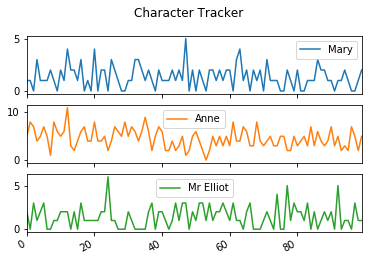

In [34]:
def locations(target_token, document,num_bins): 
    list_of_indices = [ent.root.i for ent in document.ents if ent.string.strip().lower() == target_token]
    return pd.Series(np.histogram(list_of_indices, bins=num_bins)[0])

text = x
number_of_bins = 100
characters = {'Anne', 'Mr Elliot','Mary'}
pd.DataFrame({name: locations(name.lower(),text,number_of_bins) for name in characters}).plot(subplots=True,title="Character Tracker")


An extension to what I have designed I would have preferred for the characters to be paired as a dictionary with their respective 'LOC' entity types. This could have been done by printing the novel text as a list identifying the PERSON and LOC entity types in one column and the values for these categories in another column. Where a character has a location entity type as the next line in the list it is safe to assume that in the novel the character has been mentioned in this location and therefore can be zipped together in the dictionary. The final step would have been to then filter out the characters I am interested in and show the results as a histogram or a heatmap.  

My challenge with this design was creating a function that could pick out the person entity type, move on to the next line of the list and if this was a location entity type then it would be able to pair the two values together.

## Question 4: Applications in Information Retrieval and Extraction (25 marks)
Imagine that you have access to a database containing English-language newspaper and magazine articles for the last 50 years. **Describe in detail** how you would go about building a question-answering system to answer questions about historical events including:
* Who was the leader of the National Union of Miners during the miners' strikes of the 1980s?
* Where was the football World Cup held in 2002?
* When did Princess Diana die?

You are not expected to write any code for this question.  You should, however, describe the challenges and the strategies your system will employ to attempt to overcome them.

As no code is expected, you can, if you wish, submit a pdf rather than a notebook file for this question.

**Answer 4:** 

Question answering (QA) is a computer science discipline within the fields of information retrieval and natural language processing, which is concerned with building systems that automatically answer questions posed by humans in a natural language. Given that we have been provided with IR-based factoid questions, I would go about creating a closed-domain question answering system. A closed-domain question answering system is a that answers questions from a specific domain where the questions are usually restricted to be of ‘descriptive’ nature.<font color=blue>[7]</font>

Assuming the questions above are all answerable, The first step to creating my QA model is to do some query formulation. For this, I would perform a keyword search to identify the words that will directly lead to producing the correct answer. I have adapted some of the code from `Lab 11_1` that demonstrates this. Please run the cell below to see how this works:

In [17]:
def normalise(tokenlist):
    tokenlist=[token.lower() for token in tokenlist]
    tokenlist=["NUM" if token.isdigit() else token for token in tokenlist]
    tokenlist=["Nth" if (token.endswith(("nd","st","th")) and token[:-2].isdigit()) else token for token in tokenlist]
    tokenlist=["NUM" if re.search("^[+-]?[0-9]+\.[0-9]",token) else token for token in tokenlist]
    return tokenlist
def filter_stopwords(tokenlist):
    stop = stopwords.words('english')
    return [w for w in tokenlist if w.isalpha() and w not in stop]
def stem(tokenlist):
    st=PorterStemmer()
    return [st.stem(token) for token in tokenlist]
def make_bow(somestring):
    rep=word_tokenize(somestring)
    rep=normalise(rep)
    rep=stem(rep)
    rep=filter_stopwords(rep)
    dict_rep={}
    for token in rep:
        dict_rep[token]=dict_rep.get(token,0)+1
    return(dict_rep)
def extract_keywords(somestring):
    return set(make_bow(somestring).keys())

In [18]:
question1 = "Who was the leader of the National Union of Miners during the miners' strikes of the 1980s?"
extract_keywords(question1)

{'dure', 'leader', 'miner', 'nation', 'strike', 'union', 'wa'}

In [19]:
question2 = "Where was the football World Cup held in 2002?" 
extract_keywords(question2)

{'cup', 'footbal', 'held', 'num', 'wa', 'world'}

In [20]:
question3 = "When did Princess Diana die?"
extract_keywords(question3)

{'diana', 'die', 'princess'}

The next step is to create an index of these keywords and use them to perform a document search to find paragraphs containing that keyword. I would create a class for this operation, this is so that it can be globally accessed and is not bound to be only being called within the same file as the QA system I am creating. This is especially important for an effective document search. 

After identifying the documents that these keywords are found in, I would then rank these documents by calculating a tf-idf score of each word in the query. The function that performs this operation will return the first ranked document and where in the document the query lies. This is where the answers lie.

Some of the challenges that my system could face are:
* Accidental lexical gap- In a natural language, the same meaning can be expressed in different ways. Because a question can usually only be answered if every referred concept is identified, bridging this gap significantly increases the proportion of questions that can be answered by a system.

* Ambiguity- It is the phenomenon of the same phrase having different meanings; this can be structural and syntactic or lexical and semantic. The same string accidentally refers to different concepts and polysemy, where the same string refers to different but related concepts.

- Multilingualism- Knowledge on the Web is expressed in various languages. While RDF resources can be described in multiple languages at once using language tags, there is not a single language that is always used in Web documents. <font color=blue>[6]</font>

- Reasoning questions- Answering questions like "If Princess Diana was still alive today how old would she be?" might be a struggle for the system to comprehend as there is a condition embedded within the question that is also linked to the eventual answer. This specific example may require a numerical calculation. 

- Dealing with different data types- Some questions may be posed as a different data type other than text.<font color=blue>[7]</font> For example:<div> <img src="attachment:Attachments/WhichoneisPrincessDiana.png" width="350"/> </div>. ![title](Attachments/1.png)

Solutions to some of these challenges that have been implemented into my system are:
* Building a classifier that will help determine whether a question is answerable or not. 

* Finding the sentences within a paragraph which are most relevant to a query.

* Ranking of documents by their tf-idf scores minimises the ambiguity of a query. The highest-ranking documents will be more likely to be in the correct context of the query. This is because we have the luxury of taking into consideration the semantics of a keyword when it is identified within a document.

* The document search allows the system to identify the relevant documents that a query could be found in. This remains true for queries in different languages as the document search is vast.

Use the code below to verify that the length of your submission does not exceed 3000 words.

In [35]:
##This code will word count all of the markdown cells in the notebook saved at filepath
##Running it before providing any answers shows that the questions have a word count of 1202

import io
from nbformat import current

filepath="R2.ipynb"
question_count=1125

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Submission length is 2984


## Biblography 

[1] MonkeyLearn. 2017. *Blog*. [Online]. Available at: https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/ [Accessed: 15th July 2019].

[2] Weeds, J., 2018. Lab 3_1. *Natural Language Engineering*, [Online]. Available at: https://canvas.sussex.ac.uk/courses/4190/pages/week-3-activities?module_item_id=301095 [Accessed 11 August 2019].

[3] Weeds, J., 2018. Lab 3_2. *Natural Language Engineering*, [Online]. Available at: https://canvas.sussex.ac.uk/courses/4190/pages/week-3-activities?module_item_id=301095 [Accessed 16 July 2019].

[4] Weeds, J., 2018. Lab 4_1. *Natural Language Engineering*, [Online]. Available at: https://canvas.sussex.ac.uk/courses/4190/pages/week-4-activities?module_item_id=301095 [Accessed 16 July 2019].

[5] Weeds, J., 2018. Lecture 4_1. *Natural Language Engineering*, [Online]. Available at: https://canvas.sussex.ac.uk/courses/4190/pages/week-4-activities?module_item_id=301095 [Accessed 16 July 2019].

[6] Lingvo Masino. 2018. *Question Answering in Natural Language Processing [Part-I].* [Online]. Available at: https://medium.com/lingvo-masino/question-and-answering-in-natural-language-processing-part-i-168f00291856 [Accessed: 8th August 2019]. 

[7] mc.ai. 2018. *Question Answering Systems. Why? What? How?* [Online]. Available at: https://mc.ai/question-answering-systems-why-what-how/ [Accessed: 8th August 2019].

[8] skymind. 2018. *Evaluation Metrics for Machine Learning - Accuracy, Precision, Recall, and F1 Defined* [Online]. Available at: https://skymind.com/wiki/accuracy-precision-recall-f1 [Accessed: 12th August 2019]. 